Try again using the SMOTE technique


Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1047
           1       0.67      0.69      0.68       253

    accuracy                           0.87      1300
   macro avg       0.80      0.80      0.80      1300
weighted avg       0.87      0.87      0.87      1300



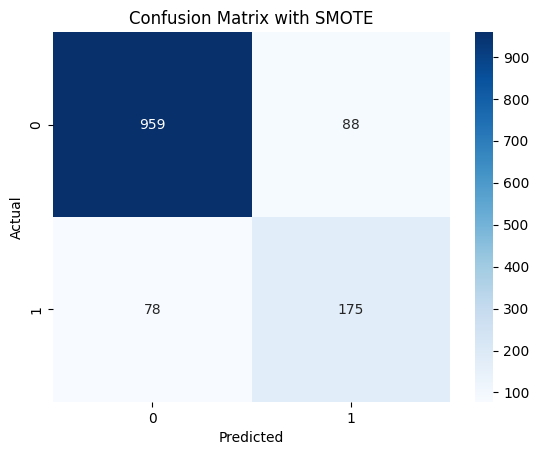

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
white_wine = pd.read_csv('./resources/winequality-white.csv', sep=';')
red_wine = pd.read_csv('./resources/winequality-red.csv', sep=';')

# Combine datasets
white_wine['type'] = '0'
red_wine['type'] = '1'
wine_data = pd.concat([white_wine, red_wine], ignore_index=True)

wine_data.drop("free sulfur dioxide", axis=1, inplace=True)


wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_res, y_train_res)
y_pred_smote = rf_classifier_smote.predict(X_test)
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()

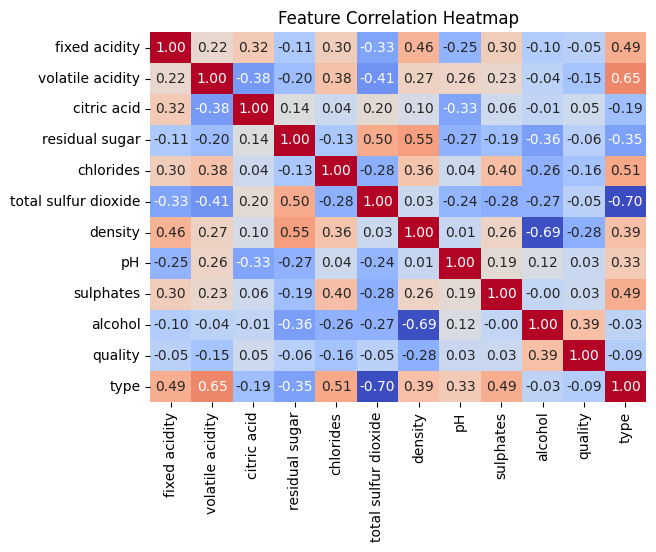

In [6]:
wine_data.drop("free sulfur dioxide", axis=1, inplace=True)
sns.heatmap(wine_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Feature Correlation Heatmap')
plt.show()